# ML Final Project


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
## Imports
import numpy as np
import pandas as pd

In [ ]:
## Load data
path = '/content/drive/MyDrive/ML Final Project/data/'
data_amzn = np.loadtxt(path + 'amazon_cells_labelled.txt', dtype='object',delimiter='\t')
x_amzn = [data[0] for data in data_amzn]
y_amzn = [int(data[1]) for data in data_amzn]

data_imdb = np.loadtxt(path + 'imdb_labelled.txt', dtype='object',delimiter='\t')
x_imdb = [data[0] for data in data_imdb]
y_imdb = [int(data[1]) for data in data_imdb]

data_yelp = np.loadtxt(path + 'yelp_labelled.txt', dtype='object',delimiter='\t')
x_yelp = [data[0] for data in data_yelp]
y_yelp = [int(data[1]) for data in data_yelp]

train_cutoff = 800
dev_cutoff = 900

x_train = x_amzn[0:train_cutoff] + x_imdb[0:train_cutoff] + x_yelp[0:train_cutoff]
y_train = y_amzn[0:train_cutoff] + y_imdb[0:train_cutoff] + y_yelp[0:train_cutoff]

x_dev = x_amzn[train_cutoff:dev_cutoff] + x_imdb[train_cutoff:dev_cutoff] + x_yelp[train_cutoff:dev_cutoff]
y_dev = y_amzn[train_cutoff:dev_cutoff] + y_imdb[train_cutoff:dev_cutoff] + y_yelp[train_cutoff:dev_cutoff]

x_test = x_amzn[dev_cutoff:] + x_imdb[dev_cutoff:] + x_yelp[dev_cutoff:]
y_test = y_amzn[dev_cutoff:] + y_imdb[dev_cutoff:] + y_yelp[dev_cutoff:]

## Balance Test

In [ ]:
y_tr = np.array(y_train)
y_dv = np.array(y_dev)
y_tt = np.array(y_test)

In [ ]:
# test if all classes balanced or not
# For Training
for i in np.unique(y_tr):
    print(f'{len(y_tr[y_tr==i])} examples of class {i}')

# For validation
for i in np.unique(y_dv):
    print(f'{len(y_dv[y_dv==i])} examples of class {i}')

# For Test
for i in np.unique(y_tt):
    print(f'{len(y_tt[y_tt==i])} examples of class {i}')
#######################################################


1153 examples of class 0
1247 examples of class 1
161 examples of class 0
139 examples of class 1
186 examples of class 0
113 examples of class 1


## Simple Classifiers

In [ ]:
# ALL SKLEARN IMPORTS HERE
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Helper to run metrics
def evaluate(pipe):
  pipe.fit(x_train, y_train)
  predictions = pipe.predict(x_test)
  print('accuracy:', accuracy_score(y_test, predictions))
  # print(confusion_matrix(y_test, predictions))
  print(classification_report(y_test, predictions))

In [ ]:
# Print misclassified examples
def get_misclassified(pipe):
  pipe.fit(x_train, y_train)
  predictions = pipe.predict(x_test)
  misclassified = np.where(y_test != pipe.predict(x_test))
  return np.array(x_test)[misclassified]

In [ ]:
# baseline (bag of words -> logistic regression)
pipe = Pipeline([
  ('bag_of_words', CountVectorizer()),
  ('clf', LogisticRegression()),
])
evaluate(pipe)
baseline_missed = get_misclassified(pipe)
print(baseline_missed)

accuracy: 0.8127090301003345
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       186
           1       0.75      0.76      0.75       113

    accuracy                           0.81       299
   macro avg       0.80      0.80      0.80       299
weighted avg       0.81      0.81      0.81       299

["I can hear while I'm driving in the car, and usually don't even have to put it on it's loudest setting."
 "Couldn't figure it out"
 'While I managed to bend the leaf spring back in place, the metal now has enough stress that it will break on the next drop.'
 'much better than the hard plastic cases.' 'It also had a new problem.'
 'You get extra minutes so that you can carry out the call and not get cut off."'
 'I have had mine for about a year and this Christmas I bought some for the rest of the family.'
 'I had to purchase a different case.'
 'This is the phone to get for 2005.... I just bought my S710a and all I can say is WOW!'
 'I

In [ ]:
# tfidf -> logistic regression
pipe = Pipeline([
  ('bag_of_words', CountVectorizer()),
  ('tfidf', TfidfTransformer()),
  ('clf', LogisticRegression()),
])
evaluate(pipe);
missed = get_misclassified(pipe)

accuracy: 0.8260869565217391
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       186
           1       0.75      0.81      0.78       113

    accuracy                           0.83       299
   macro avg       0.81      0.82      0.82       299
weighted avg       0.83      0.83      0.83       299



In [ ]:
# bag-of-words -> svm
pipe = Pipeline([
  ('bag_of_words', CountVectorizer()),
  ('clf', SVC()),
])
evaluate(pipe);

accuracy: 0.8093645484949833
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       186
           1       0.74      0.76      0.75       113

    accuracy                           0.81       299
   macro avg       0.80      0.80      0.80       299
weighted avg       0.81      0.81      0.81       299



In [ ]:
# bag-of-words -> naive bayes
pipe = Pipeline([
  ('bag_of_words', CountVectorizer()),
  ('clf', MultinomialNB()),
])
evaluate(pipe);

accuracy: 0.8160535117056856
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       186
           1       0.75      0.78      0.76       113

    accuracy                           0.82       299
   macro avg       0.80      0.81      0.81       299
weighted avg       0.82      0.82      0.82       299



## Custom Features

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

import nltk
nltk.download('stopwords')

from textblob import TextBlob

import numpy as np
import warnings
import string


#for i in range(len(x_train)):
#  words = x_train[i].split()
#  filtered_sentence = [w for w in words if not w in stop_words]
#  x_train[i] = " ".join(filtered_sentence)
#for i in range(len(x_test)):
#  words = x_test[i].split()
#  filtered_sentence = [w for w in words if not w in stop_words]
#  x_test[i] = " ".join(filtered_sentence)

from sklearn.base import BaseEstimator, TransformerMixin

#Custom feature transformer
class BasicFeatures( BaseEstimator, TransformerMixin ):
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
    
    def fit( self, X, y = None ):
        return self 
    
    def transform( self, X, y = None ):
      stop_words = list(set(stopwords.words('english')))
      warnings.filterwarnings('ignore')
      punctuation = string.punctuation

      df = pd.DataFrame(X, columns=['data']) 
      df['words'] = df['data'].apply(lambda x: x.split())
      df['char_count'] = df['data'].apply(len)
      df['word_count'] = df['data'].apply(lambda x: len(x.split()))
      df['word_density'] = df['char_count'] / (df['word_count']+1)
      df['punctuation_count'] = df['data'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
      df['upper_case_word_count'] = df['data'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
      df['stopword_count'] = df['data'].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in stop_words]))
      def count_positive(text):
          pos = 0
          for word in text:
            testimonial = TextBlob(word)
            if testimonial.sentiment.polarity >= 0.5:
              pos += 1
          return pos

      def count_negative(text):
          neg = 0
          for word in text:
            testimonial = TextBlob(word)
            if testimonial.sentiment.polarity <= -0.5:
              neg += 1
          return neg

      def count_n2_positive(text):
          pos = 0
          for i in range(len(text) - 1):
            words = ""
            for j in range(i, i+1):
              words = words + text[j]
            testimonial = TextBlob(words)
            if testimonial.sentiment.polarity >= 0.5:
              pos += 1
          return pos

      def count_n2_negative(text):
          neg = 0
          for i in range(len(text) - 1):
            words = ""
            for j in range(i, i+1):
              words = words + text[j]
            testimonial = TextBlob(words)
            if testimonial.sentiment.polarity <= -0.5:
              neg += 1
          return neg


      df['positive'] = df['words'].apply(count_positive)
      df['negative'] = df['words'].apply(count_negative)
      df['neutral'] = df['word_count'] - df['positive'] - df['negative']
      df['n2_positive'] = df['words'].apply(count_n2_positive)
      df['n2_negative'] = df['words'].apply(count_n2_negative)
      df['polarity'] = df['data'].apply(lambda x: TextBlob(x).sentiment.polarity)
      df['subjectivity'] = df['data'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
      return df[self._feature_names]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
basic = BasicFeatures(['char_count', 'word_count', 'word_density', 'punctuation_count', 'upper_case_word_count', 'stopword_count', 'positive', 'negative', 'neutral', 'n2_positive', 'n2_negative', 'polarity', 'subjectivity'])
df = basic.transform(x_train)
df.insert(loc=0, column='data', value=x_train)
df

,data,char_count,word_count,word_density,punctuation_count,upper_case_word_count,stopword_count,positive,negative,neutral,n2_positive,n2_negative,polarity,subjectivity
0,So there is no way for me to plug it in here i...,82,21,3.727273,1,2,15,0,0,21,0,0,0.000000,0.000000
1,"Good case, Excellent value.",27,4,5.400000,2,0,0,2,0,2,2,0,0.850000,0.800000
2,Great for the jawbone.,22,4,4.400000,1,0,2,1,0,3,1,0,0.800000,0.750000
3,Tied to charger for conversations lasting more...,79,11,6.583333,3,1,4,1,0,10,1,0,0.390625,0.250000
4,The mic is great.,17,4,3.400000,1,0,2,1,0,3,0,0,0.800000,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,So good I am going to have to review this plac...,146,32,4.424242,2,1,18,1,0,31,1,0,0.350000,0.333333
2396,"The chips and salsa were really good, the sals...",63,12,4.846154,2,0,6,1,0,11,1,0,0.545000,0.625000
2397,This place is great!!!!!!!!!!!!!!,33,4,6.600000,14,0,2,1,0,3,0,0,1.000000,0.750000
2398,Mediocre food.,14,2,4.666667,1,0,0,0,1,1,0,1,-0.500000,1.000000


## Feature Visualization

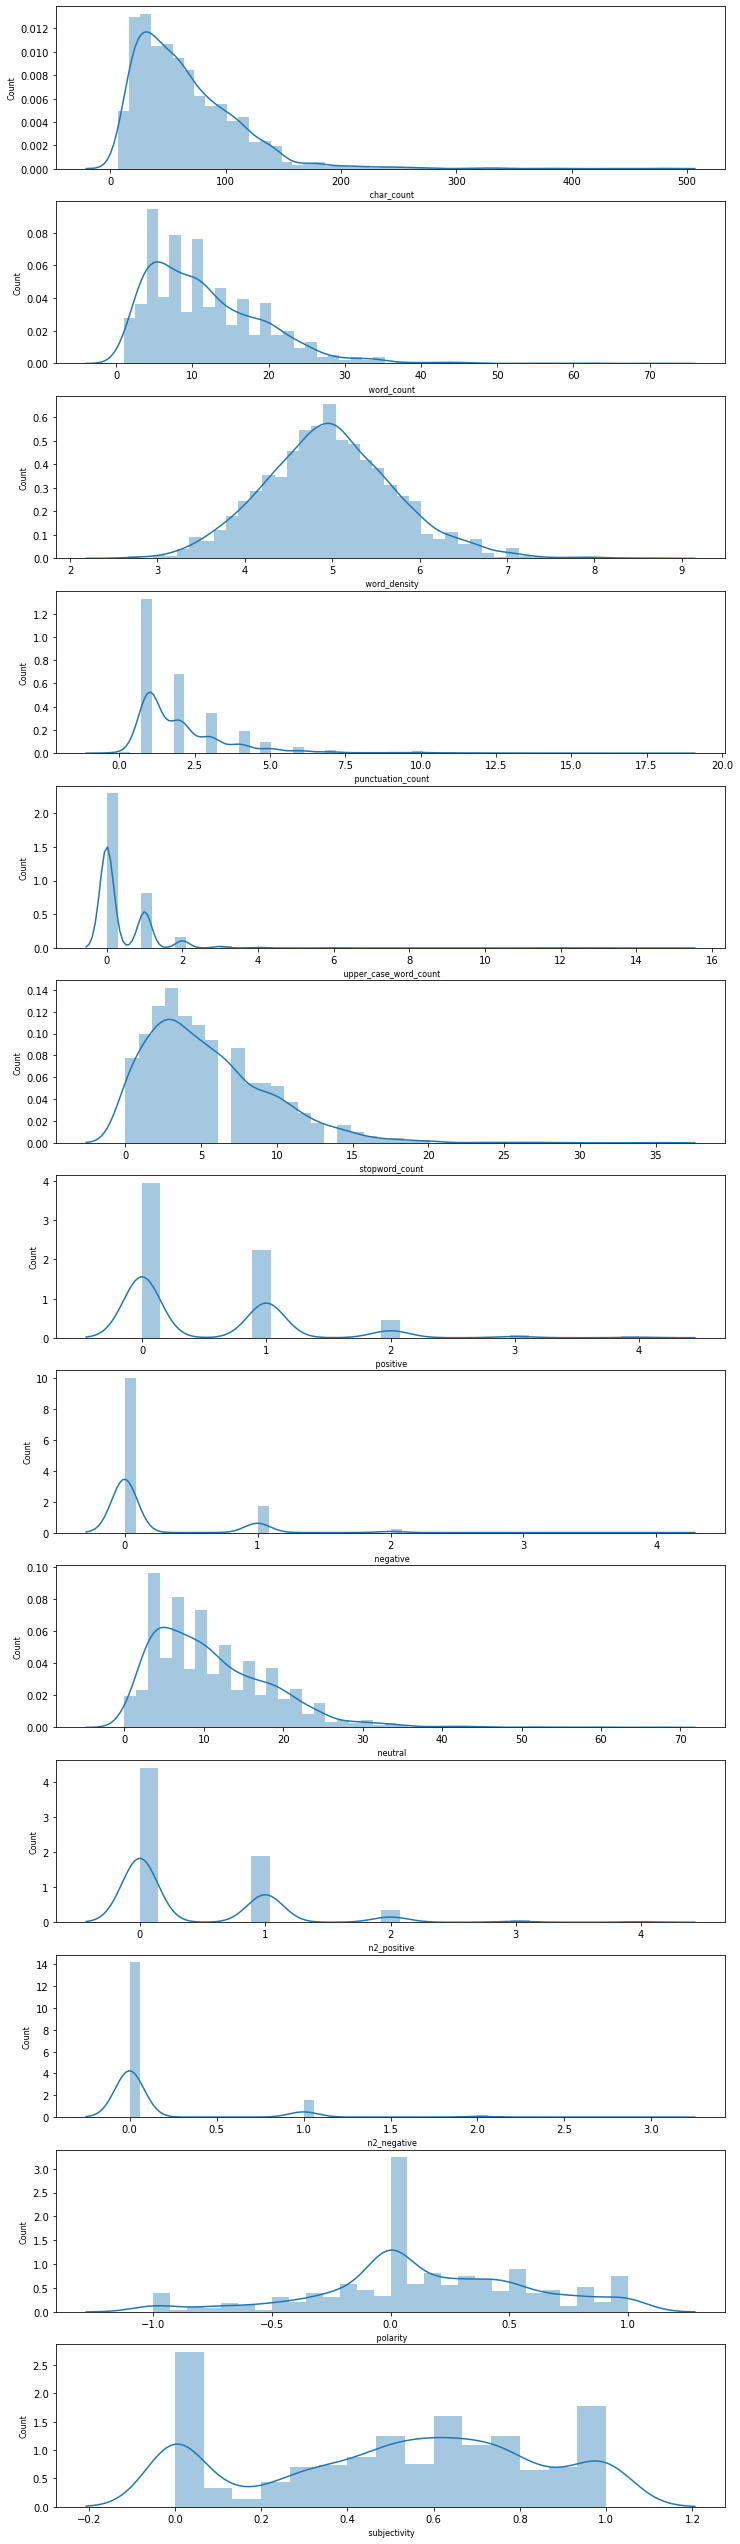

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['char_count', 'word_count', 'word_density', 'punctuation_count', 'upper_case_word_count', 'stopword_count', 'positive', 'negative', 'neutral', 'n2_positive', 'n2_negative', 'polarity', 'subjectivity']
fig,  ax = plt.subplots(13, figsize=(12,46))
for i, feature_name in enumerate(list(features)):
   sns.distplot(df[feature_name], hist=True, ax=ax[i]);
   ax[i].set_ylabel('Count', fontsize=8);
   ax[i].set_xlabel(" {}".format(feature_name), fontsize=8);

## Correlation Matrix Heatmap

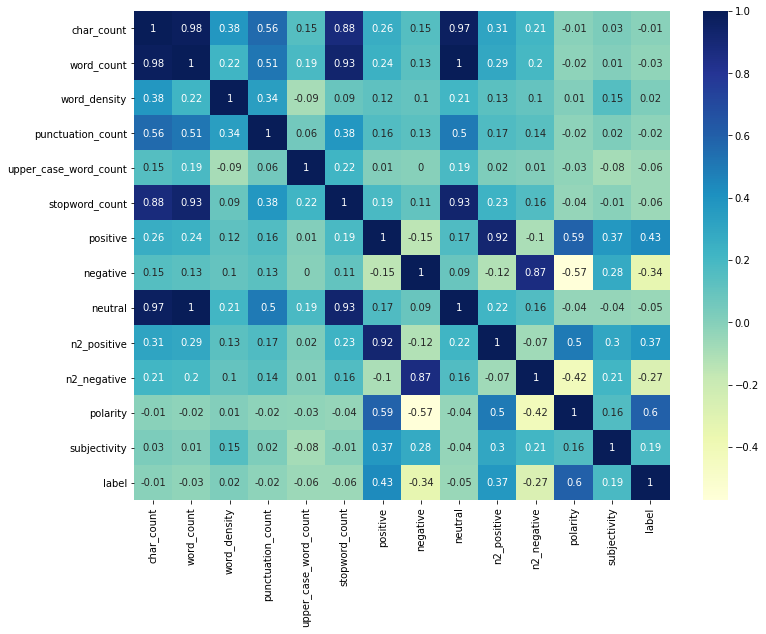

In [ ]:
plt.figure(figsize=(12, 9));
df_corr = df.copy()
df_corr['label'] = y_train
correlation_matrix = df_corr.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

## Feature Selection (?)

Text(0.5, 1.0, 'Sorted Mutual Information Scores')

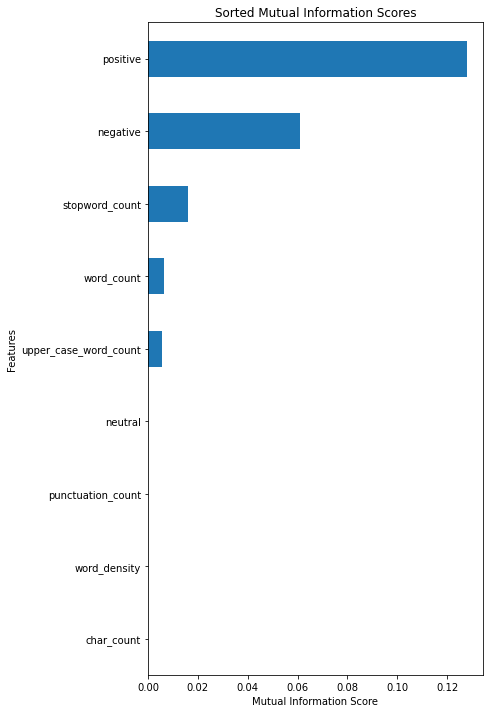

In [ ]:
import sklearn.feature_selection
import random
randSeed = random.seed()
y_tr = np.array(y_train)
y_tr = y_tr.astype(np.float)
df_tr = df.drop(['data'], axis = 1)
mi_results = sklearn.feature_selection.mutual_info_classif(df_tr, y_tr, random_state=randSeed)

#Present results
header = df_tr.columns.tolist()
features = header[0:len(header)]
names_scores = {'Names':features, 'Scores':mi_results} 
ns = pd.DataFrame(names_scores)
ns = ns.sort_values(by='Scores')
ns #Report sorted feature scores

#Visualize sorted feature scores
ns['Scores'].plot(kind='barh',figsize=(6,12))
plt.ylabel('Features')
plt.xlabel('Mutual Information Score')
plt.yticks(np.arange(len(features)), ns['Names'])
plt.title('Sorted Mutual Information Scores')

In [ ]:
features = ['positive', 'negative']
pipe = Pipeline([
  ('features', BasicFeatures(features)),
  ('clf', LogisticRegression()),
])
evaluate(pipe)

accuracy: 0.7391304347826086
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       186
           1       0.70      0.55      0.61       113

    accuracy                           0.74       299
   macro avg       0.73      0.70      0.71       299
weighted avg       0.73      0.74      0.73       299



In [ ]:
features = ['positive', 'negative','n2_positive', 'n2_negative', 'polarity']
pipe = Pipeline([
  ('features', BasicFeatures(features)),
  ('clf', LogisticRegression()),
])
evaluate(pipe)

accuracy: 0.7759197324414716
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       186
           1       0.71      0.68      0.70       113

    accuracy                           0.78       299
   macro avg       0.76      0.76      0.76       299
weighted avg       0.77      0.78      0.77       299



In [ ]:
features = ['polarity', 'subjectivity']
pipe = Pipeline([
  ('features', BasicFeatures(features)),
  ('clf', SVC()),
])
evaluate(pipe)
missed = get_misclassified(pipe)

In [ ]:
features = ['char_count', 'word_count', 'word_density', 'punctuation_count', 'upper_case_word_count', 'stopword_count', 'positive', 'negative', 'neutral']
pipe = Pipeline([
  ('features', BasicFeatures(features)),
  ('clf', LogisticRegression()),
])
# evaluate(pipe)
missed = get_misclassified(pipe).tolist()
print(np.array(missed).reshape(-1, 1))

df = basic.transform(missed)
df.insert(loc=0, column='data', value=missed)
df

[['Not nearly as good looking as the AMAZON picture makes it look.']
 ["I can hear while I'm driving in the car, and usually don't even have to put it on it's loudest setting."]
 ['Seller shipped quickly and much cheaper than the competitors.']
 ['So I bought about 10 of these and saved alot of money.']
 ["My phone sounded OK ( not great - OK), but my wife's phone was almost totally unintelligible, she couldn't understand a word being said on it."]
 ['Works for me.']
 ['You get extra minutes so that you can carry out the call and not get cut off."']
 ['I kept catching the cable on the seat and I had to pull the phone out to turn it on an off.']
 ['Logitech Bluetooth Headset is a 10!.']
 ['I like the fact that it rests lightly against your ear, rather than inside.']
 ['I have tried these cables with my computer and my iPod and it works just fine.']
 ["I'm returning them."]
 ['It is easy to turn on and off when you are in the car and the volume controls are quite accessable.']
 ['I have 

,data,char_count,word_count,word_density,punctuation_count,upper_case_word_count,stopword_count,positive,negative,neutral
0,Not nearly as good looking as the AMAZON pictu...,63,12,4.846154,1,1,5,1,0,11
1,"I can hear while I'm driving in the car, and u...",103,21,4.681818,5,1,12,0,0,21
2,Seller shipped quickly and much cheaper than t...,61,9,6.100000,1,0,3,0,0,9
3,So I bought about 10 of these and saved alot o...,54,12,4.153846,1,1,7,0,0,12
4,"My phone sounded OK ( not great - OK), but my ...",142,26,5.259259,8,2,10,3,0,23
...,...,...,...,...,...,...,...,...,...,...
72,It sure does beat the nachos at the movies but...,105,21,4.772727,1,1,11,2,0,19
73,The problem I have is that they charge $11.99 ...,149,28,5.137931,5,1,16,2,0,26
74,It really is impressive that the place hasn't ...,58,10,5.272727,2,0,5,1,0,9
75,Appetite instantly gone.,24,3,6.000000,1,0,0,0,0,3
